In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in Data

In [2]:
wines = pd.read_csv("winequality-red.csv")

In [3]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Explore Data

In [4]:
def counts_per_group(data, target, column):
    return data.groupby(target).mean(column)[column]

### Wine Quality

In [5]:
for i in wines.columns[:-1]:
    print(counts_per_group(wines, "quality", str(i)))
    print("\n")

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
8    8.566667
Name: fixed acidity, dtype: float64


quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64


quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64


quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64


quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64


quality
3    11.000000
4    12.264151
5    16.983847
6    15.711599
7    14.045226
8    13.277778
Name: free sulfur dioxide, dtype: float64


quality
3    24.900000
4    36.245283
5    56.513950
6    40.869906
7    35.020101
8    33.444444
Name: total sulfur dioxide, dtype: float64


quality
3    0.997464
4    0.996542
5    0.997104
6    0.996615
7  

Text(0.5, 0, 'Quality')

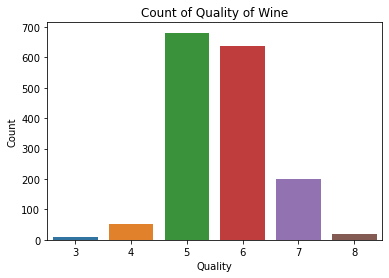

In [6]:
sns.countplot(x = "quality", data = wines)
plt.title("Count of Quality of Wine")
plt.ylabel("Count")
plt.xlabel("Quality")

A majority of the qualites are either 5 or 6.

### Features

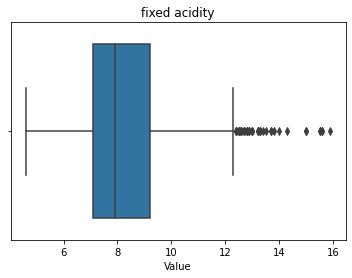

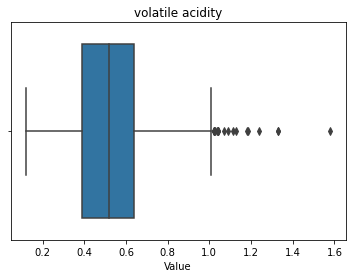

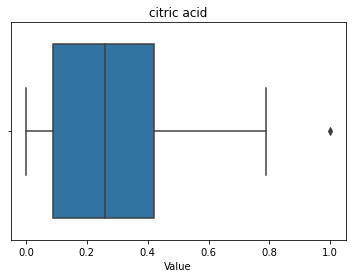

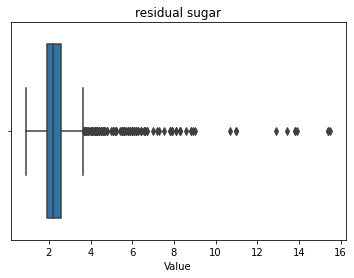

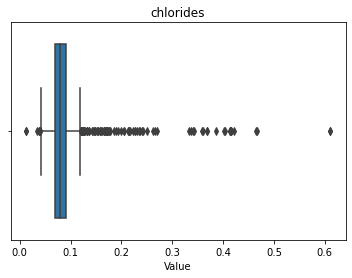

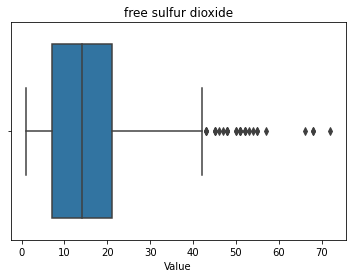

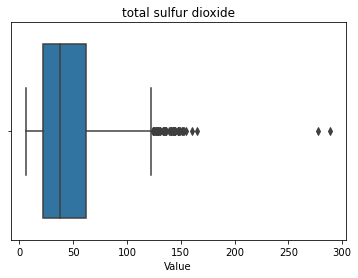

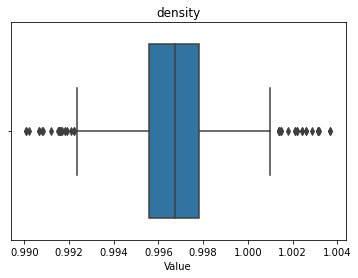

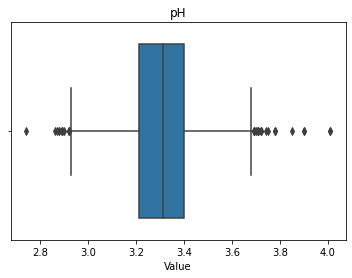

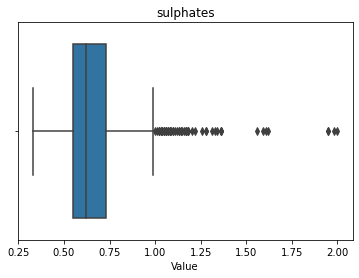

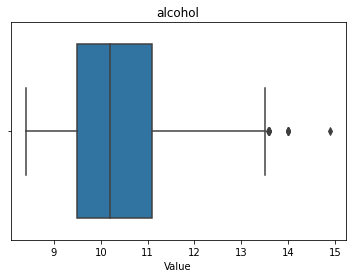

In [212]:
for i in wines.columns[:-1]:
    sns.boxplot(x = str(i), data = wines)
    plt.title(str(i))
    plt.xlabel("Value")
    plt.show()

### Correlation Matrix

<AxesSubplot:>

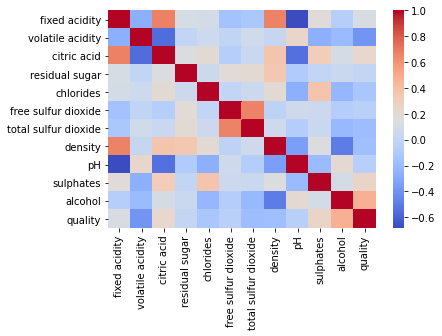

In [152]:
corr = wines.corr()
sns.heatmap(corr, cmap = "coolwarm")

### Modeling

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

In [87]:
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_preds)
    return roc_auc_score(y_test, y_pred, average=average)

In [118]:
numeric_transformer = StandardScaler()

### KNN

In [92]:
X = wines.drop("quality", axis = 1)
y = wines["quality"]

In [106]:
X_names = X.columns

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 42)

In [94]:
knn_model = KNeighborsClassifier()

In [170]:
knn_pipeline = Pipeline(steps = [
    ("preprocess", numeric_transformer),
    ("model", knn_model)
])

In [171]:
knn_grid = {
    "model__n_neighbors": [5, 6, 7, 8, 9, 10, 11],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

In [172]:
knn_clf = GridSearchCV(knn_pipeline, param_grid = knn_grid, cv = 5)

In [173]:
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11],
                         'model__weights': ['uniform', 'distance']})

In [174]:
knn_clf.best_score_

0.6607046568627452

In [175]:
knn_clf.best_params_

{'model__algorithm': 'auto',
 'model__n_neighbors': 11,
 'model__weights': 'distance'}

In [176]:
knn_y_preds = knn_clf.predict(X_test)

In [177]:
confusion_matrix(y_test, knn_y_preds)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  5,  5,  0,  0],
       [ 0,  0, 98, 31,  1,  0],
       [ 0,  0, 34, 89,  9,  0],
       [ 0,  0,  1, 14, 26,  1],
       [ 0,  0,  0,  0,  5,  0]], dtype=int64)

In [178]:
knn_accuracy = accuracy_score(y_test, knn_y_preds)
knn_accuracy

0.665625

In [179]:
knn_roc_auc = multiclass_roc_auc_score(y_test, knn_y_preds)
knn_roc_auc

0.6256834873245888